In [1]:
import os

print(" Checking /kaggle/input/ contents:")
datasets = os.listdir('/kaggle/input')
print(f"Found {len(datasets)} dataset(s):\n")
for ds in datasets:
    print(f"    /kaggle/input/{ds}")

 Checking /kaggle/input/ contents:
Found 1 dataset(s):

    /kaggle/input/cic2017


In [2]:
import os
import sys
import shutil

# Detect if running on Kaggle or Local
IS_KAGGLE = os.path.exists('/kaggle')

if IS_KAGGLE:
    print(" Running on Kaggle")
    
    # CICIDS 2017 dataset path - update this if your dataset name is different
    DATA_2017_INPUT = '/kaggle/input/cic2017'
    
    # Working directories
    DATA_2017_WORKING = '/kaggle/working/data/2017'
    DATA_2018_WORKING = '/kaggle/working/data/2018'
    
else:
    print(" Running on Local")
    BASE_DIR = '/Users/nguyentiendang0106/Documents/d4l_ds_2025'
    DATA_2017_WORKING = f'{BASE_DIR}/data/2017'
    DATA_2018_WORKING = f'{BASE_DIR}/data/2018'

print(f"\n Paths configured:")
if IS_KAGGLE:
    print(f"   2017 Input:   {DATA_2017_INPUT}")
print(f"   2017 Working: {DATA_2017_WORKING}")
print(f"   2018 Working: {DATA_2018_WORKING}")

 Running on Kaggle

 Paths configured:
   2017 Input:   /kaggle/input/cic2017
   2017 Working: /kaggle/working/data/2017
   2018 Working: /kaggle/working/data/2018


In [3]:
# Create necessary directories
if IS_KAGGLE:
    print(" Creating directory structure...")
    !mkdir -p {DATA_2017_WORKING}/original
    !mkdir -p {DATA_2017_WORKING}/clean
    !mkdir -p {DATA_2018_WORKING}/original
    !mkdir -p {DATA_2018_WORKING}/clean
    print(" Directories created")

 Creating directory structure...
 Directories created


In [4]:
# Copy CICIDS 2017 data from input to working directory (Kaggle only)
if IS_KAGGLE:
    print(" Setting up CICIDS 2017 data...\n")
    
    # Check if the dataset path exists
    if not os.path.exists(DATA_2017_INPUT):
        print(" ERROR: CICIDS 2017 dataset not found!")
        print(f"   Current path: {DATA_2017_INPUT}")
        print("\n To fix this:")
        print("   1. Check DATASETS section on the right sidebar")
        print("   2. Note the exact dataset name")
        print("   3. Update DATA_2017_INPUT variable in cell 1")
    else:
        # Copy data
        print("Copying files...")
        !cp -r {DATA_2017_INPUT}/* {DATA_2017_WORKING}/original/
        
        # Fix directory structure if dataset has nested folders
        nested_original = f"{DATA_2017_WORKING}/original/original"
        if os.path.exists(nested_original):
            print(" Fixing nested directory structure...")
            for item in os.listdir(nested_original):
                shutil.move(f"{nested_original}/{item}", f"{DATA_2017_WORKING}/original/{item}")
            os.rmdir(nested_original)
        
        # Verify
        csv_files = [f for f in os.listdir(f"{DATA_2017_WORKING}/original") if f.endswith('.csv')]
        print(f"\n CICIDS 2017 ready: {len(csv_files)} CSV files")
        for f in sorted(csv_files):
            size_mb = os.path.getsize(f"{DATA_2017_WORKING}/original/{f}") / (1024*1024)
            print(f"   • {f} ({size_mb:.1f} MB)")

 Setting up CICIDS 2017 data...

Copying files...
 Fixing nested directory structure...

 CICIDS 2017 ready: 8 CSV files
   • Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv (91.6 MB)
   • Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv (97.2 MB)
   • Friday-WorkingHours-Morning.pcap_ISCX.csv (71.9 MB)
   • Monday-WorkingHours.pcap_ISCX.csv (256.2 MB)
   • Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv (103.7 MB)
   • Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv (87.8 MB)
   • Tuesday-WorkingHours.pcap_ISCX.csv (166.6 MB)
   • Wednesday-workingHours.pcap_ISCX.csv (272.4 MB)


In [5]:
# Download CICIDS 2018 data from AWS S3 (Kaggle only)
if IS_KAGGLE:
    print(" Setting up CICIDS 2018 data...")
    print(" This will take 5-10 minutes for ~6GB data\n")
    
    # Install AWS CLI
    print("Installing AWS CLI...")
    !pip install awscli -q
    
    # Download from S3
    print("\nDownloading from S3...")
    !aws s3 cp --no-sign-request --region eu-west-3 \
        "s3://cse-cic-ids2018/Processed Traffic Data for ML Algorithms/" \
        {DATA_2018_WORKING}/original/ --recursive
    
    # Verify
    csv_files = [f for f in os.listdir(f"{DATA_2018_WORKING}/original") if f.endswith('.csv')]
    print(f"\n CICIDS 2018 ready: {len(csv_files)} CSV files")
    for f in sorted(csv_files):
        size_mb = os.path.getsize(f"{DATA_2018_WORKING}/original/{f}") / (1024*1024)
        print(f"   • {f} ({size_mb:.1f} MB)")

 Setting up CICIDS 2018 data...
 This will take 5-10 minutes for ~6GB data

Installing AWS CLI...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 41.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 58.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 570.5/570.5 kB 24.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.25.1 requires botocore<1.40.62,>=1.40.46, but you have botocore 1.40.71 which is incompatible.
s3fs 2025.3.0 requires fsspec==2025.3.0.*, but you have fsspec 2025.10.0 which is incompatible.
sphinx 8.2.3 requires docutils<0.22,>=0.20, but you have docutils 0.19 which is incompatible.
google-auth 2.38.0 requires cachetools<6.0,>=2.0.0, but you have cachetools 6.2.1 which is incompatible.

download: s3://cse-cic-ids2018/Processed Traffic Data for ML Alg

In [6]:
import pandas as pd

print("="*70)
print(" DATA VERIFICATION")
print("="*70)

def verify_dataset(name, path):
    print(f"\n{name}:")
    original_path = f"{path}/original"
    
    if not os.path.exists(original_path):
        print(f"    Directory not found: {original_path}")
        return False
    
    csv_files = [f for f in os.listdir(original_path) if f.endswith('.csv')]
    
    if not csv_files:
        print(f"    No CSV files found")
        return False
    
    print(f"    {len(csv_files)} CSV files found")
    
    # Calculate total size
    total_size = sum(os.path.getsize(f"{original_path}/{f}") for f in csv_files) / (1024*1024*1024)
    print(f"    Total size: {total_size:.2f} GB")
    
    # Test read one file
    try:
        sample_file = csv_files[0]
        df_sample = pd.read_csv(f"{original_path}/{sample_file}", nrows=3, skipinitialspace=True, encoding='latin')
        print(f"    Files are readable ({df_sample.shape[1]} columns)")
        
        if 'Label' in df_sample.columns:
            print(f"    Label column exists")
        else:
            print(f"     Label column not found!")
            return False
    except Exception as e:
        print(f"    Error reading files: {str(e)}")
        return False
    
    return True

# Verify both datasets
ready_2017 = verify_dataset("CICIDS 2017", DATA_2017_WORKING)
ready_2018 = verify_dataset("CICIDS 2018", DATA_2018_WORKING)

# Final status
print("\n" + "="*70)
print(" READY STATUS")
print("="*70)
print(f"\n{'V' if ready_2017 else 'X'} CICIDS 2017: {'READY' if ready_2017 else 'NOT READY'}")
print(f"{'V' if ready_2018 else 'X'} CICIDS 2018: {'READY' if ready_2018 else 'NOT READY'}")

if ready_2017 and ready_2018:
    print("\n All data is ready! You can proceed to data processing.")
elif ready_2017 or ready_2018:
    print("\n  Some data is ready, but not all. Check the issues above.")
else:
    print("\n Data is not ready. Please check the errors above.")

print("="*70)

 DATA VERIFICATION

CICIDS 2017:
    8 CSV files found
    Total size: 1.12 GB
    Files are readable (85 columns)
    Label column exists

CICIDS 2018:
    10 CSV files found
    Total size: 6.41 GB
    Files are readable (80 columns)
    Label column exists

 READY STATUS

V CICIDS 2017: READY
V CICIDS 2018: READY

 All data is ready! You can proceed to data processing.


In [7]:
import pandas as pd
import numpy as np
import random 
import os
import glob
import matplotlib.pyplot as plt

random.seed(0)

In [8]:
drop_columns = [
    # Dataset Specific Information
    "Flow ID", 
    "Source IP", "Src IP", 
    "Source Port", "Src Port", 
    "Destination IP", "Dst IP",
    # Features Without Observed Variance
    "Bwd PSH Flags", 
    "Fwd URG Flags", 
    "Bwd URG Flags",
    "CWE Flag Count",
    "Fwd Avg Bytes/Bulk", "Fwd Byts/b Avg", 
    "Fwd Avg Packets/Bulk", "Fwd Pkts/b Avg", 
    "Fwd Avg Bulk Rate", "Fwd Blk Rate Avg",
    "Bwd Avg Bytes/Bulk", "Bwd Byts/b Avg", 
    "Bwd Avg Packets/Bulk", "Bwd Pkts/b Avg", 
    "Bwd Avg Bulk Rate", "Bwd Blk Rate Avg",
    # Duplicate Column
    'Fwd Header Length.1'
]

mapper = {
    'Dst Port': 'Destination Port',
    'Tot Fwd Pkts': 'Total Fwd Packets',
    'Tot Bwd Pkts': 'Total Backward Packets',
    'TotLen Fwd Pkts': 'Fwd Packets Length Total', 
    'Total Length of Fwd Packets': 'Fwd Packets Length Total',
    'TotLen Bwd Pkts': 'Bwd Packets Length Total',
    'Total Length of Bwd Packets': 'Bwd Packets Length Total', 
    'Fwd Pkt Len Max': 'Fwd Packet Length Max',
    'Fwd Pkt Len Min': 'Fwd Packet Length Min', 
    'Fwd Pkt Len Mean': 'Fwd Packet Length Mean', 
    'Fwd Pkt Len Std': 'Fwd Packet Length Std',
    'Bwd Pkt Len Max': 'Bwd Packet Length Max', 
    'Bwd Pkt Len Min': 'Bwd Packet Length Min', 
    'Bwd Pkt Len Mean': 'Bwd Packet Length Mean',
    'Bwd Pkt Len Std': 'Bwd Packet Length Std', 
    'Flow Byts/s': 'Flow Bytes/s', 
    'Flow Pkts/s': 'Flow Packets/s', 
    'Fwd IAT Tot': 'Fwd IAT Total',
    'Bwd IAT Tot': 'Bwd IAT Total', 
    'Fwd Header Len': 'Fwd Header Length', 
    'Bwd Header Len': 'Bwd Header Length', 
    'Fwd Pkts/s': 'Fwd Packets/s',
    'Bwd Pkts/s': 'Bwd Packets/s', 
    'Pkt Len Min': 'Packet Length Min', 
    'Min Packet Length': 'Packet Length Min',
    'Pkt Len Max': 'Packet Length Max', 
    'Max Packet Length': 'Packet Length Max',
    'Pkt Len Mean': 'Packet Length Mean',
    'Pkt Len Std': 'Packet Length Std', 
    'Pkt Len Var': 'Packet Length Variance', 
    'FIN Flag Cnt': 'FIN Flag Count', 
    'SYN Flag Cnt': 'SYN Flag Count',
    'RST Flag Cnt': 'RST Flag Count', 
    'PSH Flag Cnt': 'PSH Flag Count', 
    'ACK Flag Cnt': 'ACK Flag Count', 
    'URG Flag Cnt': 'URG Flag Count',
    'ECE Flag Cnt': 'ECE Flag Count', 
    'Pkt Size Avg': 'Avg Packet Size',
    'Average Packet Size': 'Avg Packet Size',
    'Fwd Seg Size Avg': 'Avg Fwd Segment Size',
    'Bwd Seg Size Avg': 'Avg Bwd Segment Size', 
    'Fwd Byts/b Avg': 'Fwd Avg Bytes/Bulk',
    'Fwd Pkts/b Avg': 'Fwd Avg Packets/Bulk', 
    'Fwd Blk Rate Avg': 'Fwd Avg Bulk Rate', 
    'Bwd Byts/b Avg': 'Bwd Avg Bytes/Bulk',
    'Bwd Pkts/b Avg': 'Bwd Avg Packets/Bulk', 
    'Bwd Blk Rate Avg': 'Bwd Avg Bulk Rate', 
    'Subflow Fwd Pkts': 'Subflow Fwd Packets',
    'Subflow Fwd Byts': 'Subflow Fwd Bytes', 
    'Subflow Bwd Pkts': 'Subflow Bwd Packets', 
    'Subflow Bwd Byts': 'Subflow Bwd Bytes',
    'Init Fwd Win Byts': 'Init Fwd Win Bytes', 
    'Init_Win_bytes_forward': 'Init Fwd Win Bytes',
    'Init Bwd Win Byts': 'Init Bwd Win Bytes', 
    'Init_Win_bytes_backward': 'Init Bwd Win Bytes',
    'Fwd Act Data Pkts': 'Fwd Act Data Packets',
    'act_data_pkt_fwd': 'Fwd Act Data Packets',
    'Fwd Seg Size Min': 'Fwd Seg Size Min',
    'min_seg_size_forward': 'Fwd Seg Size Min'
}

In [9]:
def plot_day(df):
    df.loc[df["Label"] == "Benign", 'Timestamp'].plot(style='.', color="lightgreen", label='Benign')
    for label in df.Label.unique():
        if label != 'Benign':
            df.loc[df["Label"] == label, 'Timestamp'].plot(style='.', label=label)
    plt.legend()
    plt.show()

In [10]:
def clean_dataset(dataset, filetypes=['feather']):
    # Will search for all files in the dataset subdirectory 'orignal'
    for file in os.listdir(f'{dataset}/original'):
        print(f"------- {file} -------")
        df = pd.read_csv(
            f"{dataset}/original/{file}",
            skipinitialspace=True,
            encoding='latin',
            low_memory=False
        )
        
        # Xóa dòng header bị lặp lại
        df = df[~df['Label'].astype(str).str.strip().str.lower().eq('label')]

        print(df["Label"].value_counts())
        print(f"Shape: {df.shape}")

        # Rename column names for uniform column names across files
        df.rename(columns=mapper, inplace=True)

        # Drop unrelevant columns
        df.drop(columns=drop_columns, inplace=True, errors="ignore")

        # Parse Timestamp column to pandas datetime
        df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
        df['Timestamp'] = df['Timestamp'].apply(lambda x: x + pd.Timedelta(hours=12) if x.hour < 8 else x)
        df = df.sort_values(by=['Timestamp'])

        # Make Label column Categorical
        df['Label'] =  df['Label'].replace({'BENIGN': 'Benign'})
        df['Label'] = df.Label.astype('category')

        # Parse Columns to correct dtype
        int_col = df.select_dtypes(include='integer').columns
        df[int_col] = df[int_col].apply(pd.to_numeric, errors='coerce', downcast='integer')
        float_col = df.select_dtypes(include='float').columns
        df[float_col] = df[float_col].apply(pd.to_numeric, errors='coerce', downcast='float')
        obj_col = df.select_dtypes(include='object').columns
        print(f'Columns with dtype == object: {obj_col}')
        df[obj_col] = df[obj_col].apply(pd.to_numeric, errors='coerce')

        # Drop rows with invalid data
        df.replace([np.inf, -np.inf], np.nan, inplace=True)
        print(f"{df.isna().any(axis=1).sum()} invalid rows dropped")
        df.dropna(inplace=True)

        # Drop duplicate rows
        df.drop_duplicates(inplace=True, subset=df.columns.difference(['Label', 'Timestamp']))
        print(df["Label"].value_counts())
        print(f"shape: {df.shape}\n")

        # Reset index
        df.reset_index(inplace=True, drop=True)

        # Plot resulting file
        plot_day(df)

        # Save to file
        if 'feather' in filetypes:
            df.to_feather(f'{dataset}/clean/{file}.feather')
        if 'parquet' in filetypes:
            df.to_parquet(f'{dataset}/clean/{file}.parquet', index=False)

In [11]:
def aggregate_data(dataset, save=True, filetype='feather'):
    # Will search for all files in the 'clean' directory of the correct filetype and aggregate them
    all_data = pd.DataFrame()
    for file in glob.glob(f'{dataset}/clean/*.{filetype}'):
        print(file)
        df = pd.DataFrame()
        if filetype == 'feather':
            df = pd.read_feather(file)
        if filetype == 'parquet':
            df = pd.read_parquet(file)
        print(df.shape)
        print(f'{df["Label"].value_counts()}\n')
        all_data = pd.concat([all_data, df], ignore_index=True)
    print('ALL DATA')
    duplicates = all_data[all_data.duplicated(subset=all_data.columns.difference(['Label', 'Timestamp']))]
    print('Removed duplicates after aggregating:')
    print(duplicates.Label.value_counts())
    print('Resulting Dataset')
    all_data.drop(duplicates.index, axis=0, inplace=True)
    all_data.reset_index(inplace=True, drop=True)
    print(all_data.shape)
    print(f'{all_data["Label"].value_counts()}\n')
    if save:
        malicious = all_data[all_data.Label != 'Benign'].reset_index(drop = True)
        benign = all_data[all_data.Label == 'Benign'].reset_index(drop = True)
        if filetype == 'feather':
            all_data.to_feather(f'{dataset}/clean/all_data.feather')
            malicious.to_feather(f'{dataset}/clean/all_malicious.feather')
            benign.to_feather(f'{dataset}/clean/all_benign.feather')
        if filetype == 'parquet':
            all_data.to_parquet(f'{dataset}/clean/all_data.parquet', index=False)
            malicious.to_parquet(f'{dataset}/clean/all_malicious.parquet', index=False)
            benign.to_parquet(f'{dataset}/clean/all_benign.parquet', index=False)

------- Friday-WorkingHours-Morning.pcap_ISCX.csv -------
Label
BENIGN    189067
Bot         1966
Name: count, dtype: int64
Shape: (191033, 85)
Columns with dtype == object: Index([], dtype='object')
122 invalid rows dropped
Label
Benign    182096
Bot         1948
Name: count, dtype: int64
shape: (184044, 70)



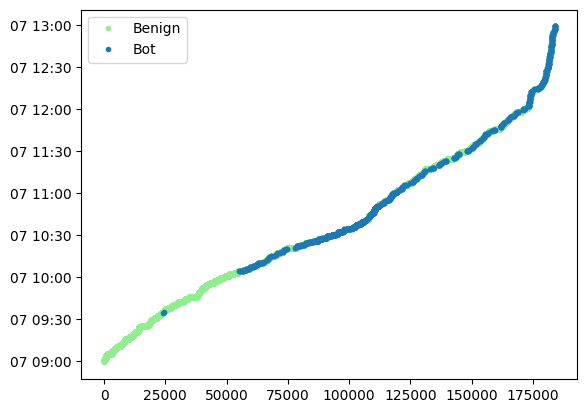

------- Tuesday-WorkingHours.pcap_ISCX.csv -------
Label
BENIGN         432074
FTP-Patator      7938
SSH-Patator      5897
Name: count, dtype: int64
Shape: (445909, 85)
Columns with dtype == object: Index([], dtype='object')
264 invalid rows dropped
Label
Benign         412476
FTP-Patator      5931
SSH-Patator      3219
Name: count, dtype: int64
shape: (421626, 70)



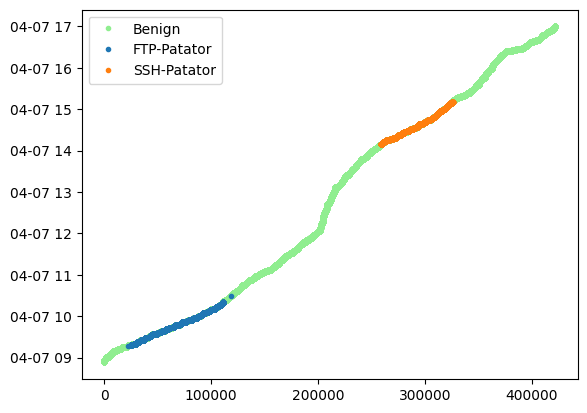

------- Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv -------
Label
BENIGN                        168186
Web Attack  Brute Force        1507
Web Attack  XSS                 652
Web Attack  Sql Injection        21
Name: count, dtype: int64
Shape: (458968, 85)
Columns with dtype == object: Index([], dtype='object')
288737 invalid rows dropped
Label
Benign                        162036
Web Attack  Brute Force        1470
Web Attack  XSS                 652
Web Attack  Sql Injection        21
Name: count, dtype: int64
shape: (164179, 70)



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


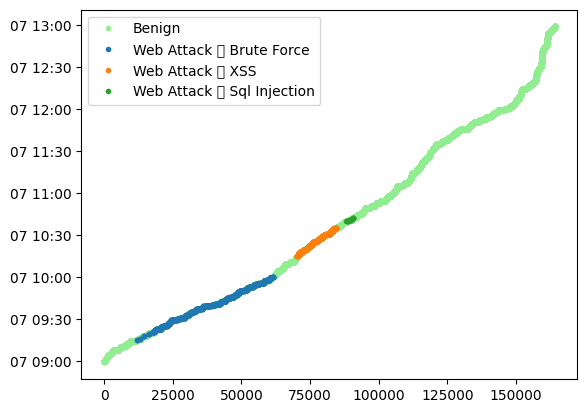

------- Monday-WorkingHours.pcap_ISCX.csv -------
Label
BENIGN    529918
Name: count, dtype: int64
Shape: (529918, 85)
Columns with dtype == object: Index([], dtype='object')
437 invalid rows dropped
Label
Benign    502769
Name: count, dtype: int64
shape: (502769, 70)



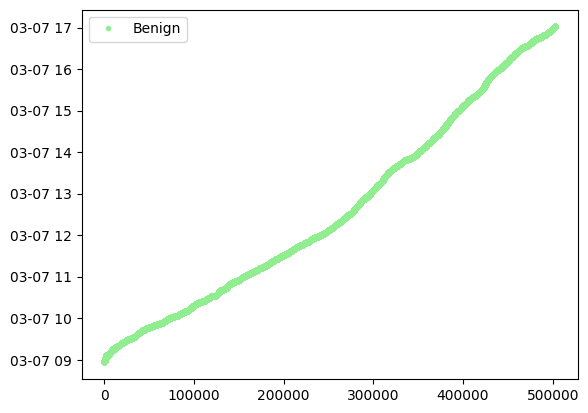

------- Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv -------
Label
PortScan    158930
BENIGN      127537
Name: count, dtype: int64
Shape: (286467, 85)
Columns with dtype == object: Index([], dtype='object')
371 invalid rows dropped
Label
Benign      123083
PortScan     90694
Name: count, dtype: int64
shape: (213777, 70)



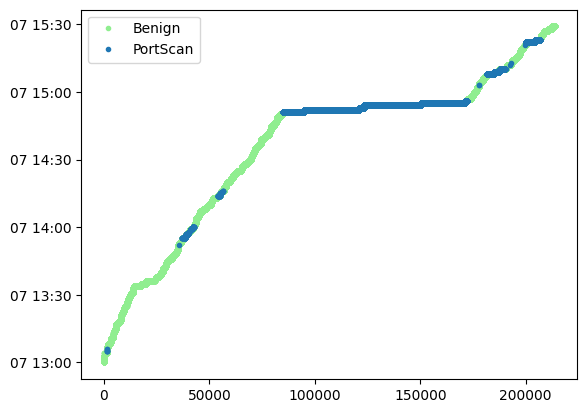

------- Wednesday-workingHours.pcap_ISCX.csv -------
Label
BENIGN              440031
DoS Hulk            231073
DoS GoldenEye        10293
DoS slowloris         5796
DoS Slowhttptest      5499
Heartbleed              11
Name: count, dtype: int64
Shape: (692703, 85)
Columns with dtype == object: Index([], dtype='object')
1297 invalid rows dropped
Label
Benign              416694
DoS Hulk            172841
DoS GoldenEye        10286
DoS slowloris         5385
DoS Slowhttptest      5228
Heartbleed              11
Name: count, dtype: int64
shape: (610445, 70)



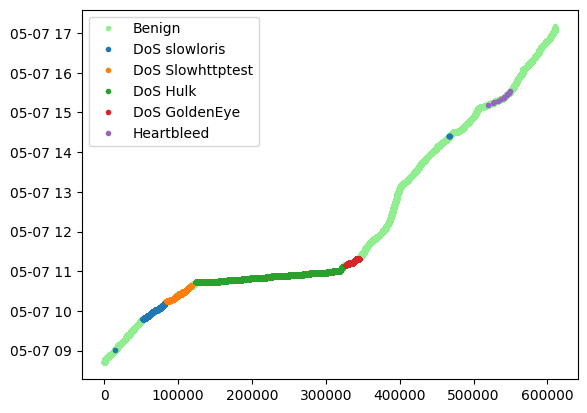

------- Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv -------
Label
BENIGN          288566
Infiltration        36
Name: count, dtype: int64
Shape: (288602, 85)
Columns with dtype == object: Index([], dtype='object')
207 invalid rows dropped
Label
Benign          252754
Infiltration        36
Name: count, dtype: int64
shape: (252790, 70)



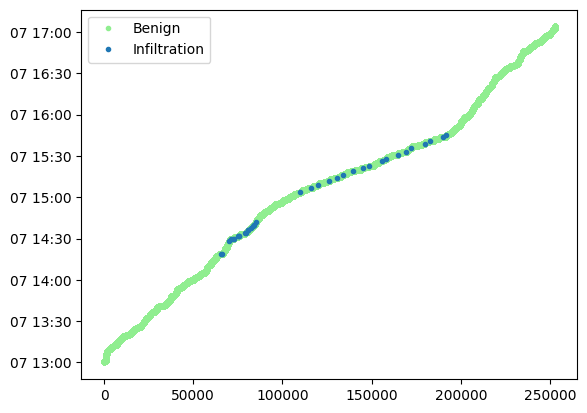

------- Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv -------
Label
DDoS      128027
BENIGN     97718
Name: count, dtype: int64
Shape: (225745, 85)
Columns with dtype == object: Index([], dtype='object')
34 invalid rows dropped
Label
DDoS      128014
Benign     95068
Name: count, dtype: int64
shape: (223082, 70)



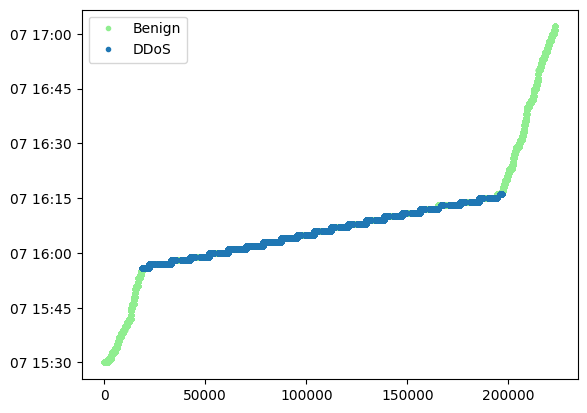

In [12]:
# clean_dataset(DATA_2017_WORKING, filetypes=['feather', 'parquet'])
clean_dataset(DATA_2017_WORKING, filetypes=['parquet'])

In [13]:
# Aggregate CICIDS 2017
# df_2017_feather = aggregate_data(DATA_2017_WORKING, save=True, filetype='feather')
df_2017_parquet = aggregate_data(DATA_2017_WORKING, save=True, filetype='parquet')

/kaggle/working/data/2017/clean/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv.parquet
(223082, 70)
Label
DDoS      128014
Benign     95068
Name: count, dtype: int64

/kaggle/working/data/2017/clean/Friday-WorkingHours-Morning.pcap_ISCX.csv.parquet
(184044, 70)
Label
Benign    182096
Bot         1948
Name: count, dtype: int64

/kaggle/working/data/2017/clean/Tuesday-WorkingHours.pcap_ISCX.csv.parquet
(421626, 70)
Label
Benign         412476
FTP-Patator      5931
SSH-Patator      3219
Name: count, dtype: int64

/kaggle/working/data/2017/clean/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv.parquet
(164179, 70)
Label
Benign                        162036
Web Attack  Brute Force        1470
Web Attack  XSS                 652
Web Attack  Sql Injection        21
Name: count, dtype: int64

/kaggle/working/data/2017/clean/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv.parquet
(213777, 70)
Label
Benign      123083
PortScan     90694
Name: count, dtype: int64

/kaggle/working/

------- Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv -------
Label
Benign           544200
Infilteration     68871
Name: count, dtype: int64
Shape: (613071, 80)


/tmp/ipykernel_48/3616921450.py:25: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')


Columns with dtype == object: Index(['Destination Port', 'Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packets Length Total',
       'Bwd Packets Length Total', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count'

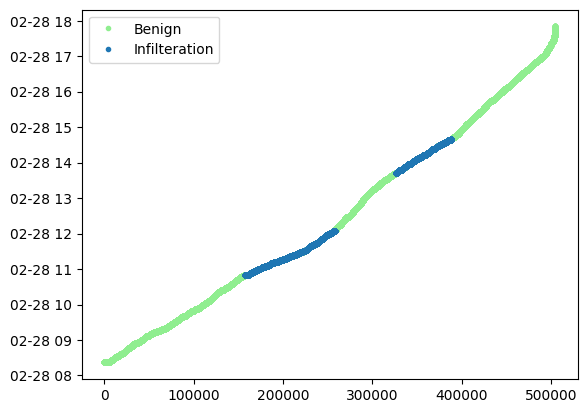

------- Friday-23-02-2018_TrafficForML_CICFlowMeter.csv -------
Label
Benign              1048009
Brute Force -Web        362
Brute Force -XSS        151
SQL Injection            53
Name: count, dtype: int64
Shape: (1048575, 80)


/tmp/ipykernel_48/3616921450.py:25: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')


Columns with dtype == object: Index([], dtype='object')
5708 invalid rows dropped
Label
Benign              904642
Brute Force -Web       341
Brute Force -XSS       150
SQL Injection           48
Name: count, dtype: int64
shape: (905181, 70)



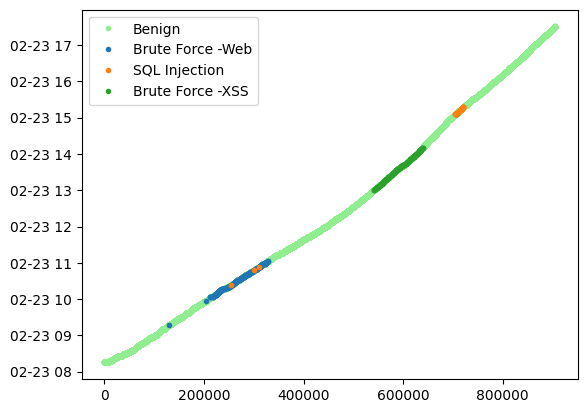

------- Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv -------
Label
Benign                   996077
DoS attacks-GoldenEye     41508
DoS attacks-Slowloris     10990
Name: count, dtype: int64
Shape: (1048575, 80)


/tmp/ipykernel_48/3616921450.py:25: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')


Columns with dtype == object: Index([], dtype='object')
8027 invalid rows dropped
Label
Benign                   825632
DoS attacks-GoldenEye     41406
DoS attacks-Slowloris      9908
Name: count, dtype: int64
shape: (876946, 70)



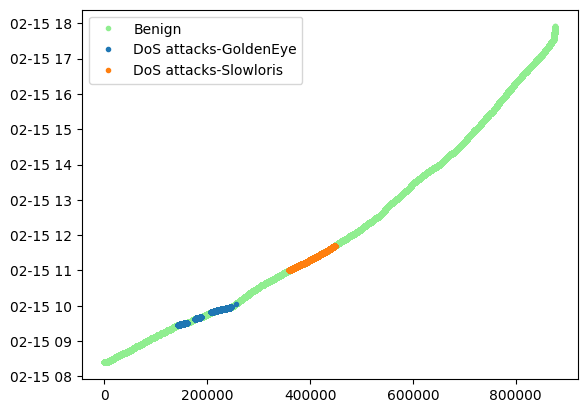

------- Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv -------
Label
Benign              1048213
Brute Force -Web        249
Brute Force -XSS         79
SQL Injection            34
Name: count, dtype: int64
Shape: (1048575, 80)


/tmp/ipykernel_48/3616921450.py:25: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')


Columns with dtype == object: Index([], dtype='object')
5610 invalid rows dropped
Label
Benign              901219
Brute Force -Web       228
Brute Force -XSS        79
SQL Injection           31
Name: count, dtype: int64
shape: (901557, 70)



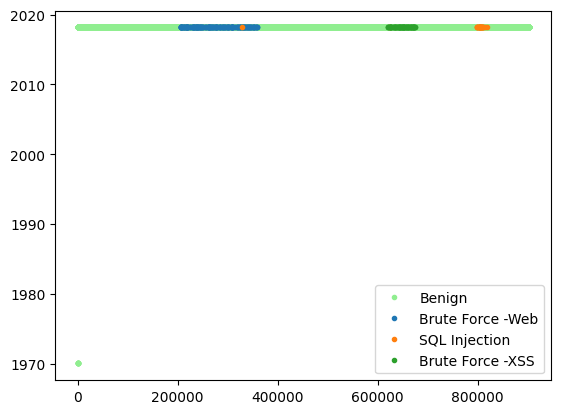

------- Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv -------
Label
DDOS attack-HOIC        686012
Benign                  360833
DDOS attack-LOIC-UDP      1730
Name: count, dtype: int64
Shape: (1048575, 80)


/tmp/ipykernel_48/3616921450.py:25: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')


Columns with dtype == object: Index([], dtype='object')
0 invalid rows dropped
Label
Benign                  360814
DDOS attack-HOIC        198861
DDOS attack-LOIC-UDP      1730
Name: count, dtype: int64
shape: (561405, 70)



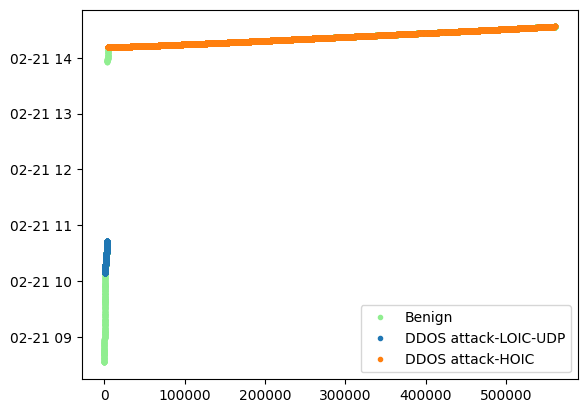

------- Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv -------
Label
Benign                    7372557
DDoS attacks-LOIC-HTTP     576191
Name: count, dtype: int64
Shape: (7948748, 84)


/tmp/ipykernel_48/3616921450.py:25: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')


Columns with dtype == object: Index([], dtype='object')
59453 invalid rows dropped
Label
Benign                    5498183
DDoS attacks-LOIC-HTTP     575364
Name: count, dtype: int64
shape: (6073547, 70)



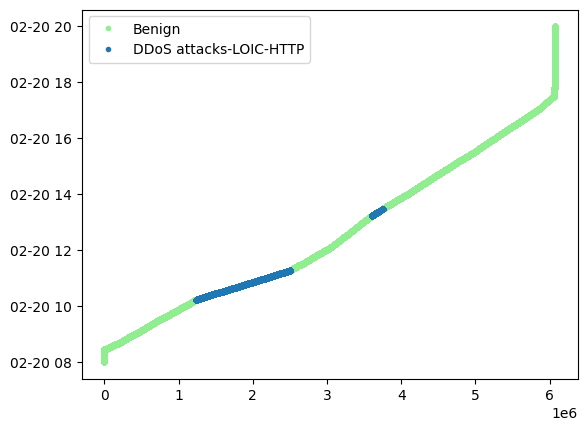

------- Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv -------
Label
Benign            667626
FTP-BruteForce    193360
SSH-Bruteforce    187589
Name: count, dtype: int64
Shape: (1048575, 80)


/tmp/ipykernel_48/3616921450.py:25: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')


Columns with dtype == object: Index([], dtype='object')
3824 invalid rows dropped
Label
Benign            577037
SSH-Bruteforce     94041
FTP-BruteForce        53
Name: count, dtype: int64
shape: (671131, 70)



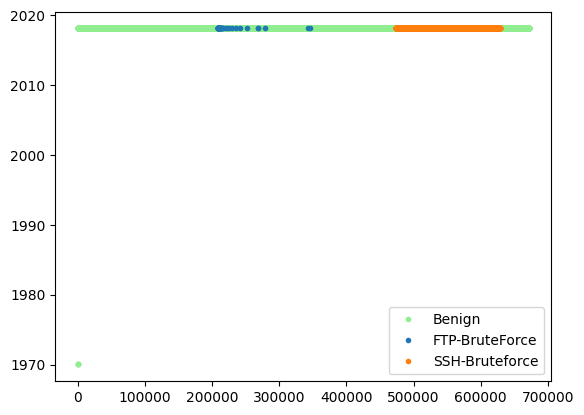

------- Friday-02-03-2018_TrafficForML_CICFlowMeter.csv -------
Label
Benign    762384
Bot       286191
Name: count, dtype: int64
Shape: (1048575, 80)
Columns with dtype == object: Index([], dtype='object')
4050 invalid rows dropped
Label
Benign    675369
Bot       144535
Name: count, dtype: int64
shape: (819904, 70)



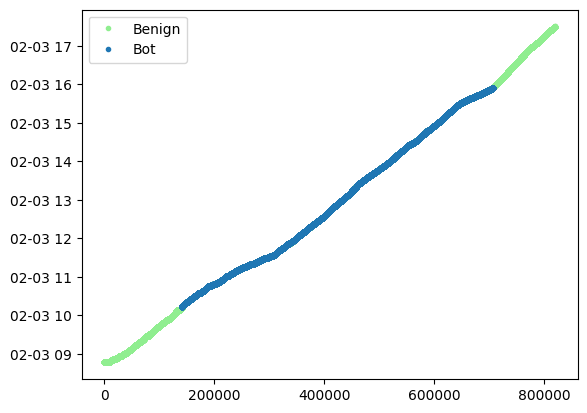

------- Friday-16-02-2018_TrafficForML_CICFlowMeter.csv -------
Label
DoS attacks-Hulk            461912
Benign                      446772
DoS attacks-SlowHTTPTest    139890
Name: count, dtype: int64
Shape: (1048574, 80)


/tmp/ipykernel_48/3616921450.py:25: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')


Columns with dtype == object: Index(['Destination Port', 'Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packets Length Total',
       'Bwd Packets Length Total', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count'

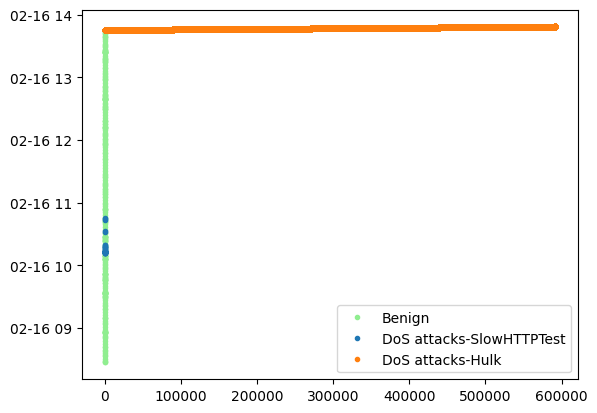

------- Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv -------
Label
Benign           238037
Infilteration     93063
Name: count, dtype: int64
Shape: (331100, 80)
Columns with dtype == object: Index(['Destination Port', 'Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packets Length Total',
       'Bwd Packets Length Total', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Len

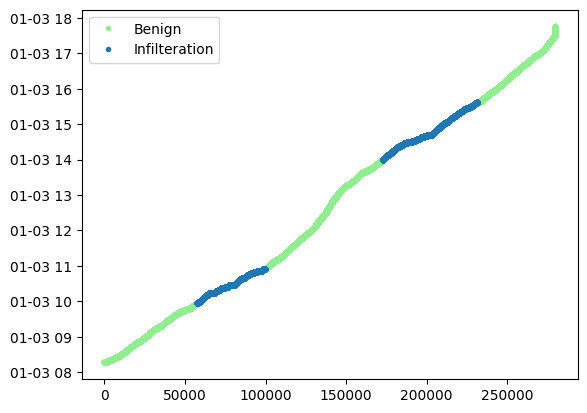

In [14]:
# clean_dataset(DATA_2018_WORKING, filetypes=['feather', 'parquet'])
clean_dataset(DATA_2018_WORKING, filetypes=['parquet'])

In [15]:
# Aggregate CICIDS 2018
# df_2018_feather = aggregate_data(DATA_2018_WORKING, save=True, filetype='feather')
df_2018_parquet = aggregate_data(DATA_2018_WORKING, save=True, filetype='parquet')

/kaggle/working/data/2018/clean/Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv.parquet
(876946, 70)
Label
Benign                   825632
DoS attacks-GoldenEye     41406
DoS attacks-Slowloris      9908
Name: count, dtype: int64

/kaggle/working/data/2018/clean/Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv.parquet
(671131, 70)
Label
Benign            577037
SSH-Bruteforce     94041
FTP-BruteForce        53
Name: count, dtype: int64

/kaggle/working/data/2018/clean/Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv.parquet
(504739, 70)
Label
Benign           448857
Infilteration     55882
Name: count, dtype: int64

/kaggle/working/data/2018/clean/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv.parquet
(819904, 70)
Label
Benign    675369
Bot       144535
Name: count, dtype: int64

/kaggle/working/data/2018/clean/Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv.parquet
(901557, 70)
Label
Benign              901219
Brute Force -Web       228
Brute Force -XSS        79
SQL Injection

# DOWNLOAD

In [16]:
import shutil

# Nén thư mục 2017/clean
shutil.make_archive('/kaggle/working/cicids2017_clean', 'zip', '/kaggle/working/data/2017/clean')

# Nén thư mục 2018/clean
shutil.make_archive('/kaggle/working/cicids2018_clean', 'zip', '/kaggle/working/data/2018/clean')

print(" Đã tạo xong 2 file zip:")
print(" - /kaggle/working/cicids2017_clean.zip")
print(" - /kaggle/working/cicids2018_clean.zip")


 Đã tạo xong 2 file zip:
 - /kaggle/working/cicids2017_clean.zip
 - /kaggle/working/cicids2018_clean.zip
